## IBM Research Technical Challenge
- This notebook and it's contents serves as my solution to the IBM Research | Africa Software Engineering Internship Program - Technical Challenge.
- The tools used in used are open source

### The Challenge
1. Find on average the top seven (7) most travelled routes for a Sunday. Indicate the average of each and rank them in decreasing order.
2. What is the probability that a passenger travelling from Kijauri will take a Shuttle if they depart before 0730 hours?
3. The Sequence ‘MK’ appears in a payment reference. Based on the tri-gram distribution of characters in all the payment references, what is the most probable next character?
4. When considering opening a new terminus in Kisii, should the terminus have mobile money capabilities? Why?

### Why use python?
- Python is a high level programming language, easier to use, and has rich libraries. It is also a production ready language, that is, you can run your model written in python in production

### Why use jupyter notebooks?
- They provide a powerful way to write and iterate code (Python or Julia or R or Scala or NodeJS) for data analysis.
- They provide data scientists with a collaborative environment where they can proces, analyse, and visualise data in an iterative manner.

### Why classify the problem as time series?
- Because we are dealing with observations at specified time, hence we need to parse the dates for our data set

#### import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train_revised.csv')

In [3]:
# have a peek of the data
data.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [4]:
data.shape

(51645, 10)

In [5]:
data['payment_method'].unique()

array(['Mpesa', 'Cash'], dtype=object)

In [6]:
data['car_type'].unique()

array(['Bus', 'shuttle'], dtype=object)

In [7]:
data['travel_from'].unique()

array(['Migori', 'Keroka', 'Homa Bay', 'Kisii', 'Keumbu', 'Rongo',
       'Kijauri', 'Oyugis', 'Awendo', 'Sirare', 'Nyachenge', 'Kehancha',
       'Kendu Bay', 'Sori', 'Rodi', 'Mbita', 'Ndhiwa'], dtype=object)

In [8]:
data['max_capacity'].unique()

array([49, 11])

In [9]:
parsed_data = pd.read_csv('train_revised.csv', parse_dates={'travel_date_time': ['travel_date', 'travel_time']})

In [10]:
parsed_data.head()

,travel_date_time,ride_id,seat_number,payment_method,payment_receipt,travel_from,travel_to,car_type,max_capacity
0,2017-10-17 07:15:00,1442,15A,Mpesa,UZUEHCBUSO,Migori,Nairobi,Bus,49
1,2017-11-19 07:12:00,5437,14A,Mpesa,TIHLBUSGTE,Migori,Nairobi,Bus,49
2,2017-11-26 07:05:00,5710,8B,Mpesa,EQX8Q5G19O,Keroka,Nairobi,Bus,49
3,2017-11-27 07:10:00,5777,19A,Mpesa,SGP18CL0ME,Homa Bay,Nairobi,Bus,49
4,2017-11-27 07:12:00,5778,11A,Mpesa,BM97HFRGL9,Migori,Nairobi,Bus,49


In [11]:
parsed_data.set_index('travel_date_time', inplace=True)

In [12]:
parsed_data.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_from,travel_to,car_type,max_capacity
travel_date_time,,,,,,,,
2017-10-17 07:15:00,1442,15A,Mpesa,UZUEHCBUSO,Migori,Nairobi,Bus,49
2017-11-19 07:12:00,5437,14A,Mpesa,TIHLBUSGTE,Migori,Nairobi,Bus,49
2017-11-26 07:05:00,5710,8B,Mpesa,EQX8Q5G19O,Keroka,Nairobi,Bus,49
2017-11-27 07:10:00,5777,19A,Mpesa,SGP18CL0ME,Homa Bay,Nairobi,Bus,49
2017-11-27 07:12:00,5778,11A,Mpesa,BM97HFRGL9,Migori,Nairobi,Bus,49


In [13]:
parsed_data['day_of_week'] = parsed_data.index.weekday_name

In [14]:
parsed_data.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_from,travel_to,car_type,max_capacity,day_of_week
travel_date_time,,,,,,,,,
2017-10-17 07:15:00,1442,15A,Mpesa,UZUEHCBUSO,Migori,Nairobi,Bus,49,Tuesday
2017-11-19 07:12:00,5437,14A,Mpesa,TIHLBUSGTE,Migori,Nairobi,Bus,49,Sunday
2017-11-26 07:05:00,5710,8B,Mpesa,EQX8Q5G19O,Keroka,Nairobi,Bus,49,Sunday
2017-11-27 07:10:00,5777,19A,Mpesa,SGP18CL0ME,Homa Bay,Nairobi,Bus,49,Monday
2017-11-27 07:12:00,5778,11A,Mpesa,BM97HFRGL9,Migori,Nairobi,Bus,49,Monday


##### Find on average the top seven (7) most travelled routes for a Sunday. Indicate the average of each and rank them in decreasing order.
> Find sundays

In [15]:
sunday_data = parsed_data[parsed_data['day_of_week'] == 'Sunday']

In [16]:
sunday_data.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_from,travel_to,car_type,max_capacity,day_of_week
travel_date_time,,,,,,,,,
2017-11-19 07:12:00,5437,14A,Mpesa,TIHLBUSGTE,Migori,Nairobi,Bus,49,Sunday
2017-11-26 07:05:00,5710,8B,Mpesa,EQX8Q5G19O,Keroka,Nairobi,Bus,49,Sunday
2018-04-15 05:20:00,5856,9,Cash,MDF1ULUMPX,Kisii,Nairobi,shuttle,11,Sunday
2018-04-15 05:00:00,5857,6,Cash,MDF1ULG1GR,Kisii,Nairobi,shuttle,11,Sunday
2018-04-15 05:00:00,5857,3,Cash,MDF6ULD8NQ,Kisii,Nairobi,shuttle,11,Sunday


In [17]:
sunday_data['travel_from'].value_counts()

Kisii        2756
Migori        973
Homa Bay      910
Sirare        629
Rongo         538
Kehancha      301
Awendo        296
Kijauri       115
Nyachenge      85
Mbita          83
Rodi           63
Ndhiwa         45
Keroka         41
Sori            9
Keumbu          3
Name: travel_from, dtype: int64

In [18]:
sunday_data.shape

(6847, 9)

In [19]:
sunday_data['travel_from'].value_counts().sum()

6847

##### Top 7 most travelled routes for a Sunday

In [20]:
sunday_data['travel_from'].value_counts().head(7)

Kisii       2756
Migori       973
Homa Bay     910
Sirare       629
Rongo        538
Kehancha     301
Awendo       296
Name: travel_from, dtype: int64

##### What is the probability that a passenger travelling from Kijauri will take a Shuttle if they depart before 0730 hours?

In [21]:
kijauri_data = parsed_data[parsed_data['travel_from'] == 'Kijauri']

In [22]:
kijauri_data.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_from,travel_to,car_type,max_capacity,day_of_week
travel_date_time,,,,,,,,,
2017-04-12 07:07:00,6560,1A,Mpesa,XY20JTZHY4,Kijauri,Nairobi,Bus,49,Wednesday
2017-04-12 07:00:00,6568,9,Mpesa,EJXHRAFPCQ,Kijauri,Nairobi,shuttle,11,Wednesday
2017-04-12 07:07:00,6560,21B,Mpesa,QVBJ6ZAT75,Kijauri,Nairobi,Bus,49,Wednesday
2017-04-12 07:06:00,6570,20B,Mpesa,0KBEL0BJDK,Kijauri,Nairobi,Bus,49,Wednesday
2017-04-12 07:00:00,6568,10,Mpesa,IFXMNKI8NO,Kijauri,Nairobi,shuttle,11,Wednesday


##### Get the data for departure before 0730 hrs
- We use the datetime module provided by python

In [23]:
import datetime

In [24]:
kijauri_data_leave_before_0730hrs = kijauri_data[kijauri_data.index.time < datetime.time(7, 30)]

In [25]:
kijauri_data_leave_before_0730hrs.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_from,travel_to,car_type,max_capacity,day_of_week
travel_date_time,,,,,,,,,
2017-04-12 07:07:00,6560,1A,Mpesa,XY20JTZHY4,Kijauri,Nairobi,Bus,49,Wednesday
2017-04-12 07:00:00,6568,9,Mpesa,EJXHRAFPCQ,Kijauri,Nairobi,shuttle,11,Wednesday
2017-04-12 07:07:00,6560,21B,Mpesa,QVBJ6ZAT75,Kijauri,Nairobi,Bus,49,Wednesday
2017-04-12 07:06:00,6570,20B,Mpesa,0KBEL0BJDK,Kijauri,Nairobi,Bus,49,Wednesday
2017-04-12 07:00:00,6568,10,Mpesa,IFXMNKI8NO,Kijauri,Nairobi,shuttle,11,Wednesday


In [26]:
kijauri_data_leave_before_0730hrs['car_type'].value_counts()

shuttle    433
Bus        386
Name: car_type, dtype: int64

In [27]:
shuttle = kijauri_data_leave_before_0730hrs['car_type'].value_counts().values[0]
bus = kijauri_data_leave_before_0730hrs['car_type'].value_counts().values[1]

##### Probability to travel by shuttle
> $(shuttle)$ / ${((shuttle)+(bus))}$

In [28]:
probability_to_travel_by_shuttle = (shuttle) / (shuttle + bus)

In [29]:
probability_to_travel_by_shuttle

0.5286935286935287

##### The Sequence ‘MK’ appears in a payment reference. Based on the tri-gram distribution of characters in all the payment references, what is the most probable next character?

##### Get the data that contains payment references with 'MK'
> We define a function to help us do that

> Then we apply it to the dataset

In [30]:
def has_MK(val):
    if 'MK' in val:
        return True
    else:
        return False

In [31]:
parsed_data['has_MK'] = parsed_data['payment_receipt'].apply(has_MK)

In [32]:
parsed_data.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_from,travel_to,car_type,max_capacity,day_of_week,has_MK
travel_date_time,,,,,,,,,,
2017-10-17 07:15:00,1442,15A,Mpesa,UZUEHCBUSO,Migori,Nairobi,Bus,49,Tuesday,False
2017-11-19 07:12:00,5437,14A,Mpesa,TIHLBUSGTE,Migori,Nairobi,Bus,49,Sunday,False
2017-11-26 07:05:00,5710,8B,Mpesa,EQX8Q5G19O,Keroka,Nairobi,Bus,49,Sunday,False
2017-11-27 07:10:00,5777,19A,Mpesa,SGP18CL0ME,Homa Bay,Nairobi,Bus,49,Monday,False
2017-11-27 07:12:00,5778,11A,Mpesa,BM97HFRGL9,Migori,Nairobi,Bus,49,Monday,False


In [33]:
data_with_MK_in_pay_reference = parsed_data[parsed_data['has_MK'] != False]

In [34]:
data_with_MK_in_pay_reference.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_from,travel_to,car_type,max_capacity,day_of_week,has_MK
travel_date_time,,,,,,,,,,
2018-04-19 05:20:00,5801,1X,Mpesa,TBJMRMKQLJ,Kisii,Nairobi,shuttle,11,Thursday,True
2018-04-17 06:30:00,5838,9,Mpesa,LYMKG9DII7,Kisii,Nairobi,shuttle,11,Tuesday,True
2018-04-15 19:04:00,5861,3A,Mpesa,7BMTKUMKJZ,Kisii,Nairobi,Bus,49,Sunday,True
2018-04-14 05:20:00,5868,1X,Mpesa,OMKHFVAGHD,Kisii,Nairobi,shuttle,11,Saturday,True
2018-05-04 05:10:00,6015,1,Mpesa,VUA7IXPMKP,Kisii,Nairobi,shuttle,11,Friday,True


#### Define a method to find the next character after 'MK'
- This will help us find the next characters
- Since alphabets are from A-Z we can find the one with highest occurrences

In [48]:
def get_next_char(val):
    val_len = len(val)
    if val.endswith('MK'):
        return 0
    start = val.find('MK')
    end = start + 2
    return val[end]

In [49]:
data_with_MK_in_pay_reference['next_char'] = data_with_MK_in_pay_reference['payment_receipt'].apply(get_next_char)

/home/moswil/anaconda3/envs/tf_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
data_with_MK_in_pay_reference.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_from,travel_to,car_type,max_capacity,day_of_week,has_MK,next_char
travel_date_time,,,,,,,,,,,
2018-04-19 05:20:00,5801,1X,Mpesa,TBJMRMKQLJ,Kisii,Nairobi,shuttle,11,Thursday,True,Q
2018-04-17 06:30:00,5838,9,Mpesa,LYMKG9DII7,Kisii,Nairobi,shuttle,11,Tuesday,True,G
2018-04-15 19:04:00,5861,3A,Mpesa,7BMTKUMKJZ,Kisii,Nairobi,Bus,49,Sunday,True,J
2018-04-14 05:20:00,5868,1X,Mpesa,OMKHFVAGHD,Kisii,Nairobi,shuttle,11,Saturday,True,H
2018-05-04 05:10:00,6015,1,Mpesa,VUA7IXPMKP,Kisii,Nairobi,shuttle,11,Friday,True,P


In [51]:
data_with_MK_in_pay_reference['next_char'].value_counts().head()

0    53
Y    20
L    20
R    19
H    19
Name: next_char, dtype: int64

In [52]:
data_with_MK_in_pay_reference['next_char'].value_counts().sum()

499

In [53]:
data_with_MK_in_pay_reference.shape

(499, 11)

From the above observations, letters **Y or L** has the highest number of occurrences of *20*, hence it's the next most probable characters

##### When considering opening a new terminus in Kisii, should the terminus have mobile money capabilities? Why?
> We consider payment mode, either MPesa or Cash

> Then the one with highest number should be used

In [41]:
kisii_data = parsed_data[parsed_data['travel_from'] == 'Kisii']

In [42]:
kisii_data.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_from,travel_to,car_type,max_capacity,day_of_week,has_MK
travel_date_time,,,,,,,,,,
2018-04-20 05:10:00,5784,1X,Mpesa,3OPU23FHRB,Kisii,Nairobi,shuttle,11,Friday,False
2018-04-20 09:50:00,5789,1X,Mpesa,BPRX4UMFFN,Kisii,Nairobi,shuttle,11,Friday,False
2018-04-20 07:06:00,5790,1B,Mpesa,DC8ABRSXXK,Kisii,Nairobi,Bus,49,Friday,False
2018-04-20 06:00:00,5791,1,Mpesa,HGQURN0SZS,Kisii,Nairobi,shuttle,11,Friday,False
2018-04-20 05:50:00,5792,1,Mpesa,8D9V8HK2FC,Kisii,Nairobi,shuttle,11,Friday,False


In [43]:
kisii_data['payment_method'].value_counts()

Mpesa    22559
Cash        48
Name: payment_method, dtype: int64

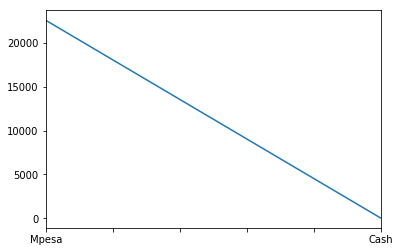

In [44]:
kisii_data['payment_method'].value_counts().plot()

In [45]:
mpesa = kisii_data['payment_method'].value_counts().values[0]
cash = kisii_data['payment_method'].value_counts().values[1]

In [46]:
print(f'Mpesa Users are: {mpesa}')
print(f'Cash Users are: {cash}')

Mpesa Users are: 22559
Cash Users are: 48


##### Opening a new terminus in Kisii.
- The new terminus should have mobile money capabilities, this is due to the high number of people who use mobile to do transactions
- From the above analysis and graph, it can therefore, be concluded that, for the business to thrive in Kisii, the new terminus must have mobile capabilities